In [3]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 44s 93ms/step - loss: 2.2938 - accuracy: 0.1313 - val_loss: 2.2377 - val_accuracy: 0.3658
Epoch 2/12
469/469 [==============================] - 44s 95ms/step - loss: 2.2293 - accuracy: 0.2577 - val_loss: 2.1463 - val_accuracy: 0.6389
Epoch 3/12
469/469 [==============================] - 44s 94ms/step - loss: 2.1395 - accuracy: 0.4037 - val_loss: 2.0183 - val_accuracy: 0.6982
Epoch 4/12
469/469 [==============================] - 50s 106ms/step - loss: 2.0151 - accuracy: 0.4888 - val_loss: 1.8461 - val_accuracy: 0.7229
Epoch 5/12
469/469 [==============================] - 47s 99ms/step - loss: 1.8532 - accuracy: 0.5456 - val_loss: 1.6352 - val_accuracy: 0.7448
Epoch 6/12
469/469 [==============================] - 43s 91ms/step - loss: 1.6627 - accuracy: 0.5888 - val_loss: 1.4085 - val_accuracy: 0.7655
Epoch 7/12
469/469 [==============================] - 44s 94ms

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


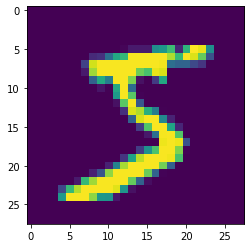

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0][:, :, 0])

In [5]:
import numpy as np
result = model.predict(np.expand_dims(x_train[0],axis=0))

In [6]:
result

array([[0.01468784, 0.01627599, 0.02671286, 0.42747992, 0.00424847,
        0.34375414, 0.01003225, 0.1111837 , 0.03708515, 0.0085397 ]],
      dtype=float32)

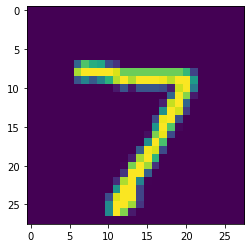

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[0][:, :, 0])

In [8]:
import numpy as np
result = model.predict(np.expand_dims(x_test[0],axis=0))

In [9]:
result

array([[7.91494828e-03, 3.34887137e-03, 3.46160913e-03, 1.68157648e-02,
        1.63145680e-02, 9.68656689e-03, 6.49201509e-04, 8.99358273e-01,
        1.25625925e-02, 2.98876576e-02]], dtype=float32)

In [11]:
# If you haven’t installed keras, tensorflow yet, run those two commands
pip install keras
pip install tensorflow